<a href="https://colab.research.google.com/github/Kraykray69/ML-Models-Single-Layer-Perceptron-MLP-Keras-and-Tensorflow-for-Digit-Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Approach for the handwritten digits

* Load the data and libraries
* Data Visualization
* Divide the data into x & Y variables
* Divide the data into train and test
* Apply ML algorithm and evaluate
* Apply the single layer perceptron and evaluate
* Apply the multi-layer perceptron and evaluate
* Implement Deep Learning using Terasflow and Keras


* Load the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

* Import Train & Test Data

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


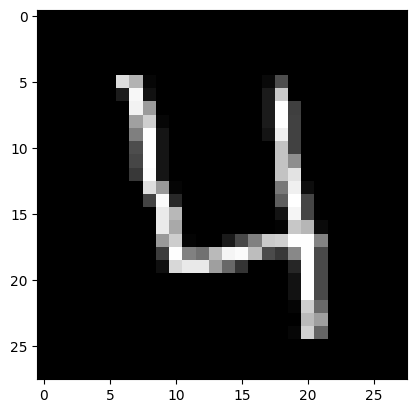

In [6]:
features = ['pixel{}'.format(pixel_num) for pixel_num in range(0,784)]
row_to_examine = 3
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data,cmap='gray')

* Divide into x and y

In [7]:
x = train.drop('label',axis=1)
y = train['label']

In [8]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


* Divide into train and test split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=143)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [11]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

# ML Models

In [12]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("Accuracy score for the train data is",accuracy_score(y_train,y_hat_train))
print("Accuracy score for the test data is",accuracy_score(y_test,y_hat_test))

Accuracy score for the train data is 0.9393452380952381
Accuracy score for the test data is 0.9229761904761905


In [14]:
model_eval(y_test,y_hat_test)

The accuracy of the model is: 0.92
[[808   0   1   0   1   2  10   4   5   1]
 [  0 911   3   3   1   1   1   0   8   2]
 [  4   9 793  20   9   2  15   8  16   0]
 [  4   4  18 779   0  27   3   7  11  12]
 [  1   4   6   1 747   1  13   1   7  21]
 [  6   4   3  26  13 629  12   2  22  15]
 [  3   1   7   0   7   7 785   0   2   1]
 [  2   3   8   7   6   2   0 838   3  36]
 [  2  10   9  36   4  26   6   4 684  10]
 [  3   8   2   6  29   4   0  18   5 779]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       832
           1       0.95      0.98      0.97       930
           2       0.93      0.91      0.92       876
           3       0.89      0.90      0.89       865
           4       0.91      0.93      0.92       802
           5       0.90      0.86      0.88       732
           6       0.93      0.97      0.95       813
           7       0.95      0.93      0.94       905
           8       0.90      0.86      0.88    

In [15]:
rf = RandomForestClassifier()
#Fit the model
rf.fit(x_train,y_train)
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [16]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.96
[[822   0   0   0   0   1   3   1   5   0]
 [  0 919   3   2   2   0   0   1   2   1]
 [  6   1 841   6   5   1   3  10   3   0]
 [  2   1  11 821   0   7   2  10   6   5]
 [  2   2   2   1 774   0   5   0   2  14]
 [  1   2   1   4   1 709   2   0   7   5]
 [  1   0   1   0   2   3 803   0   3   0]
 [  0   4  12   0   6   0   0 863   2  18]
 [  0   4   3  14   4   8   4   1 746   7]
 [  5   3   2  11  16   2   0   5   4 806]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       832
           1       0.98      0.99      0.98       930
           2       0.96      0.96      0.96       876
           3       0.96      0.95      0.95       865
           4       0.96      0.97      0.96       802
           5       0.97      0.97      0.97       732
           6       0.98      0.99      0.98       813
           7       0.97      0.95      0.96       905
           8       0.96      0.94      0.95    

In [17]:
'''gb = GradientBoostingClassifier()
#Fit the model
gb.fit(x_train, y_train)
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)'''

'gb = GradientBoostingClassifier()\n#Fit the model\ngb.fit(x_train, y_train)\ny_hat_train_gb = gb.predict(x_train)\ny_hat_test_gb = gb.predict(x_test)'

In [18]:
#model_eval(y_test, y_hat_test_gb)

In [19]:
# * Single Layer Perceptron
sp = Perceptron()
#Fit the model
sp.fit(x_train,y_train)
sp_pred_train = sp.predict(x_train)
sp_acc_train = accuracy_score(y_train,sp_pred_train)
print("Accuracy of Single Layer Perceptron: ",sp_acc_train)
sp_pred = sp.predict(x_test)
sp_acc = accuracy_score(y_test,sp_pred)
print("Accuracy of Single Layer Perceptron: ",sp_acc)

Accuracy of Single Layer Perceptron:  0.8890476190476191
Accuracy of Single Layer Perceptron:  0.8761904761904762


# Single Layer Perceptron

In [20]:
sp = Perceptron()
#Fit the model
sp.fit(x_train,y_train)
y_hat_train = sp.predict(x_train)
y_hat_test = sp.predict(x_test)

In [21]:
model_eval(y_test,y_hat_test)

The accuracy of the model is: 0.88
[[791   0  21   0   0   2  11   0   2   5]
 [  0 912   6   1   1   5   0   2   3   0]
 [  5  11 819   6   5   0   6  10  14   0]
 [  3   9  99 691   3  27   2   7  13  11]
 [  0   5  37   0 698   1   6   5  14  36]
 [  7  19  22  35  15 574  15   4  27  14]
 [  3   4  37   0   4   6 751   1   6   1]
 [  2   7  21  11   7   5   0 798   3  51]
 [  3  40  68  15   6  34   6   9 588  22]
 [  2  17  19  10  25   6   0  27  10 738]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       832
           1       0.89      0.98      0.93       930
           2       0.71      0.93      0.81       876
           3       0.90      0.80      0.85       865
           4       0.91      0.87      0.89       802
           5       0.87      0.78      0.82       732
           6       0.94      0.92      0.93       813
           7       0.92      0.88      0.90       905
           8       0.86      0.74      0.80    

In [22]:
model_eval(y_train,y_hat_train)

The accuracy of the model is: 0.89
[[3167    1   47    7    3   10   22    1   20   22]
 [   0 3693   17    8    0    8    1    4   21    2]
 [  10   33 3132   11   15    4    3   26   55   12]
 [  14   35  368 2851    3   83   12   14   56   50]
 [   3   28  126    6 2931    4    5   12   31  124]
 [  28   56  110  148   37 2469   56   28   91   40]
 [  16   27  138    0   16   24 3079    2   21    1]
 [   4   13   87   11   13    6    2 3118    9  233]
 [  14  165  224   44   12  124   20   22 2558   89]
 [   4   44   65   55   94   26    0  144   28 2874]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3300
           1       0.90      0.98      0.94      3754
           2       0.73      0.95      0.82      3301
           3       0.91      0.82      0.86      3486
           4       0.94      0.90      0.92      3270
           5       0.90      0.81      0.85      3063
           6       0.96      0.93      0.94      3324
 

# Multi-Layer Perceptron(MLP)

In [23]:
mlp = MLPClassifier(hidden_layer_sizes = (64,64,64), random_state=10, verbose=1)
mlp.fit(x_train,y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.87555994
Iteration 2, loss = 0.59313936
Iteration 3, loss = 0.38371278
Iteration 4, loss = 0.28840145
Iteration 5, loss = 0.22455286
Iteration 6, loss = 0.19151932
Iteration 7, loss = 0.15400505
Iteration 8, loss = 0.13926391
Iteration 9, loss = 0.11641243
Iteration 10, loss = 0.10915709
Iteration 11, loss = 0.09708119
Iteration 12, loss = 0.09323318
Iteration 13, loss = 0.07912823
Iteration 14, loss = 0.07250813
Iteration 15, loss = 0.07391927
Iteration 16, loss = 0.07102984
Iteration 17, loss = 0.07212895
Iteration 18, loss = 0.06498590
Iteration 19, loss = 0.05410818
Iteration 20, loss = 0.05631565
Iteration 21, loss = 0.06733955
Iteration 22, loss = 0.05933067
Iteration 23, loss = 0.05008767
Iteration 24, loss = 0.05166669
Iteration 25, loss = 0.05160590
Iteration 26, loss = 0.05231252
Iteration 27, loss = 0.04412095
Iteration 28, loss = 0.05160468
Iteration 29, loss = 0.03556606
Iteration 30, loss = 0.04894729
Iteration 31, loss = 0.04702736
Iteration 32, los

In [24]:
model_eval(y_train,y_hat_train_mlp)
model_eval(y_test,y_hat_test_mlp)

The accuracy of the model is: 0.99
[[3299    0    0    0    0    0    0    0    1    0]
 [   0 3750    1    0    2    0    0    0    0    1]
 [   6    1 3274    2    1    0    0    6   11    0]
 [   1    1    3 3466    1    3    0    5    1    5]
 [   2    0    1    0 3263    0    0    0    0    4]
 [   6    0    0    3    2 3042    2    1    4    3]
 [  39    4    4    0   32    2 3237    0    6    0]
 [   1    0    0    0    0    0    0 3495    0    0]
 [   8    1    1    4    4    0    0    1 3234   19]
 [  19    0    0    0    4    0    0    1    2 3308]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3300
           1       1.00      1.00      1.00      3754
           2       1.00      0.99      0.99      3301
           3       1.00      0.99      1.00      3486
           4       0.99      1.00      0.99      3270
           5       1.00      0.99      1.00      3063
           6       1.00      0.97      0.99      3324
 

# Approach for Keras & TensorFlow
* Load the data & libraries
* Declare the model
    * Sequential Sequence of Layers
    * Functional Multi Model/Transfer Learning
* Declare the Layers
    * Dense, Dropout
    * Number of Neurons, Act Function
* Compile the Model
    * Optimize(SGD, Adam)
    * Loss Function(Cross Entropy, MSE, RMSE)
    * Metrics(Accuracy, F1, Precision, Recall)
* Fit the Model
    * Pass X train and Y train
    * Pass X test and Y test
    * Epochs
    * Batch Size
* Predict and Evaluate the Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

One Hot Encode the Output

In [26]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [27]:
y_train

12639    0
11706    9
21118    8
28004    0
6819     6
        ..
13231    6
25121    9
17937    4
34969    8
33358    9
Name: label, Length: 33600, dtype: int64

In [28]:
y_train_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Declare models and layers

In [29]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,))) #Layer 1 and input layer
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(256,activation='relu')) #Layer 2
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(256,activation='relu')) #Layer 3
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Model Compilation

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fitting the Model

In [32]:
hist = model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6323 - loss: 11.3296 - val_accuracy: 0.8937 - val_loss: 0.4057
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8367 - loss: 0.6847 - val_accuracy: 0.9232 - val_loss: 0.2966
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8921 - loss: 0.3978 - val_accuracy: 0.9350 - val_loss: 0.2435
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9085 - loss: 0.3326 - val_accuracy: 0.9426 - val_loss: 0.2088
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9237 - loss: 0.2607 - val_accuracy: 0.9481 - val_loss: 0.2045
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9380 - loss: 0.2262 - val_accuracy: 0.9501 - val_loss: 0.1852
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9434 - loss: 0.1999 - val_accuracy: 0.9527 - val_loss: 0.1664
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9475 - loss: 0.1784 -

In [33]:
hist.history['accuracy']

[0.7336012125015259,
 0.8499404788017273,
 0.8960118889808655,
 0.9122321605682373,
 0.925803542137146,
 0.9354166388511658,
 0.9433928728103638,
 0.9486309289932251,
 0.9515178799629211,
 0.9529761672019958,
 0.9543452262878418,
 0.960178554058075,
 0.9608631134033203,
 0.9625297784805298,
 0.9620833396911621,
 0.9642261862754822,
 0.9688690304756165,
 0.9682440757751465,
 0.9670833349227905,
 0.9683035612106323,
 0.9710714221000671,
 0.9718452095985413,
 0.9684225916862488,
 0.9710714221000671,
 0.9744940400123596,
 0.9725893139839172,
 0.975565493106842,
 0.9745535850524902,
 0.9783928394317627,
 0.9781845211982727,
 0.977559506893158,
 0.9767857193946838,
 0.9773809313774109,
 0.9781845211982727,
 0.9818750023841858,
 0.9797618985176086,
 0.9808035492897034,
 0.9809523820877075,
 0.9816964268684387,
 0.9805654883384705,
 0.9799404740333557,
 0.9815773963928223,
 0.9802380800247192,
 0.9809821248054504,
 0.9817261695861816,
 0.9830357432365417,
 0.9847321510314941,
 0.98386907577514

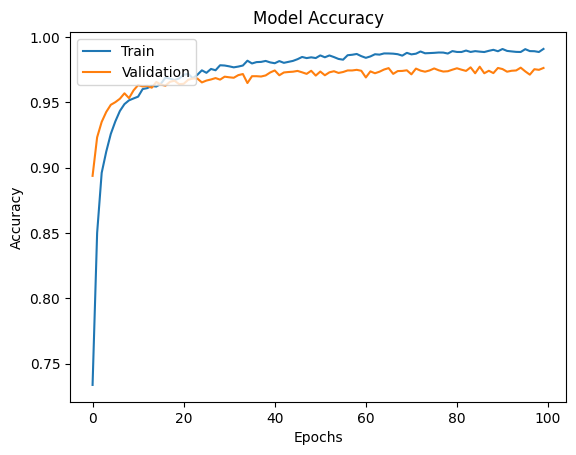

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

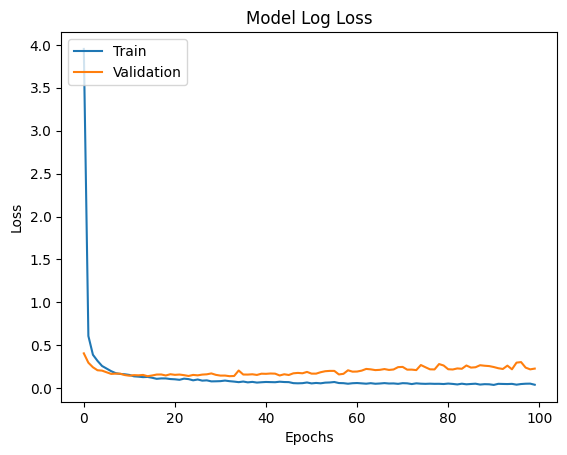

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Log Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

Model Evaluation

In [36]:
y_hat_train_dense = model.predict(x_train)
y_hat_test_dense = model.predict(x_test)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
y_hat_train_dense

array([[9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0865228e-27, 2.8087547e-23, 6.0749247e-28, ..., 9.6881192e-12,
        4.4386089e-15, 9.9999994e-01],
       [3.1678102e-17, 1.7363321e-11, 7.2566195e-08, ..., 7.2868069e-21,
        9.9999982e-01, 7.7016737e-10],
       ...,
       [8.2100715e-22, 4.1082374e-11, 2.9037525e-10, ..., 3.5874058e-07,
        1.0979619e-15, 1.4647240e-07],
       [5.7170730e-24, 1.0819349e-14, 1.3256537e-12, ..., 1.3499510e-29,
        9.9999994e-01, 1.1902470e-13],
       [5.0219024e-35, 5.8552220e-30, 1.0257594e-36, ..., 5.1580996e-14,
        3.1848436e-19, 9.9999994e-01]], dtype=float32)

In [38]:
#We can't take confusion matrix with probabilities
#argmax converts the probabilities into constants
y_hat_train_dense = np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense = np.argmax(model.predict(x_test),axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
model_eval(y_train,y_hat_train_dense)
model_eval(y_test,y_hat_test_dense)

The accuracy of the model is: 1.0
[[3296    0    0    0    0    0    0    0    4    0]
 [   0 3748    0    0    0    0    0    0    6    0]
 [   0    1 3299    0    0    0    0    0    1    0]
 [   0    0    2 3477    0    1    0    0    5    1]
 [   0    0    0    1 3263    0    1    0    0    5]
 [   0    0    0    2    0 3060    0    0    0    1]
 [   0    0    0    0    0    0 3322    0    2    0]
 [   0    0    0    0    0    0    0 3493    0    3]
 [   0    0    0    0    0    0    0    0 3270    2]
 [   0    0    0    0    0    0    0    0    4 3330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00      3754
           2       1.00      1.00      1.00      3301
           3       1.00      1.00      1.00      3486
           4       1.00      1.00      1.00      3270
           5       1.00      1.00      1.00      3063
           6       1.00      1.00      1.00      3324
  